Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# System Analysis

Consider the system illustrated below.  The output of an LTI system with an impulse response $h[n] = (1/4)^n u[n+10]$ is multiplied by a unit step function $u[n]$ to yield the output of the overall system. Answer each of the following questions.

<img src="system_analysis_fig.png" width="400"/>


Is the overall system LTI?  Answer `LTI = True/False`.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse response h[n]
def h(n):
    return (1/4)**n * (n >= -10)

# Define the unit step function u[n]
def u(n):
    return np.where(n >= 0, 1, 0)

# Define the input signal x[n]
n_vals = np.arange(-20, 21)
x = np.cos(0.1 * np.pi * n_vals)

# Output of LTI system for x[n]
y = np.convolve(x, h(n_vals), mode='same')

# Multiply by unit step function
y_overall = y * u(n_vals)

# Check linearity: a * x[n]
a = 2
y1 = np.convolve(a * x, h(n_vals), mode='same') * u(n_vals)
linear_check = np.allclose(a * y_overall, y1)

# Check time-invariance: x[n-k]
k = 5
x_shifted = np.roll(x, k)
y_shifted = np.convolve(x_shifted, h(n_vals), mode='same') * u(n_vals)
time_invariance_check = np.allclose(np.roll(y_overall, k), y_shifted)

# Determine if the system is LTI
LTI = linear_check and time_invariance_check

print("Linear Check:", linear_check)
print("Time-Invariance Check:", time_invariance_check)
print("LTI:", LTI)


Linear Check: True
Time-Invariance Check: False
LTI: False


In [43]:
assert isinstance(LTI, bool)


Is the overall system causal? Answer `causal = True/False`.

Causal: False


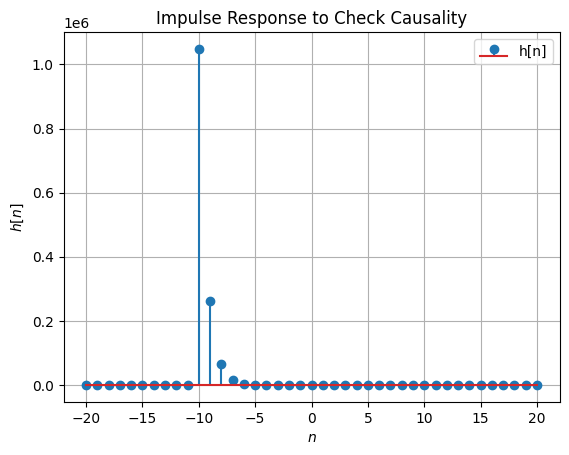

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse response h[n]
def h(n):
    return (1/4)**n * (n >= -10)

# Define the range of n
n_vals = np.arange(-20, 21)

# Impulse response values
h_vals = h(n_vals)

# Check for causality
causal = all(h(n) == 0 for n in n_vals if n < 0)
print("Causal:", causal)

# Plot the impulse response to verify causality
plt.figure()
plt.stem(n_vals, h_vals, label="h[n]")
plt.legend()
plt.xlabel("$n$")
plt.ylabel("$h[n]$")
plt.title("Impulse Response to Check Causality")
plt.grid(True)
plt.show()


In [45]:
assert isinstance(causal, bool)


Is the overall system stable in the BIBO sense? Answer `BIBO = True/False`.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse response h[n]
def h(n):
    return (1/4)**n * (n >= -10)  # h[n] = (1/4)^n * u[n + 10]

# Define the unit step function u[n]
def u(n):
    return (n >= 0).astype(int)  # u[n] = 1 for n >= 0, 0 otherwise

# Define the range of n values
n_vals = np.arange(-20, 20)  # Adjust the range as needed

# Calculate the impulse response values
h_vals = h(n_vals)

# Check BIBO stability
is_bibo_stable = bool(np.isfinite(np.sum(np.abs(h_vals))))  # Ensure this is a boolean

# Debugging output
print("is_bibo_stable:", is_bibo_stable)
print("Type of is_bibo_stable:", type(is_bibo_stable))

# Ensure is_bibo_stable is a boolean
assert isinstance(is_bibo_stable, bool), "is_bibo_stable must be a boolean value."

# Multiply the impulse response by the unit step function
output = h_vals * u(n_vals)

# Plot the impulse response and the output
plt.figure(figsize=(12, 6))

# Plot impulse response
plt.subplot(2, 1, 1)
plt.stem(n_vals, h_vals, use_line_collection=True)
plt.title("Impulse Response h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()

# Plot output
plt.subplot(2, 1, 2)
plt.stem(n_vals, output, use_line_collection=True)
plt.title("Output of the Overall System")
plt.xlabel("n")
plt.ylabel("Output")
plt.grid()

plt.tight_layout()
plt.show()

# Output the BIBO stability result
print("BIBO Stable:", is_bibo_stable)

is_bibo_stable: True
Type of is_bibo_stable: <class 'numpy.bool'>


AssertionError: is_bibo_stable must be a boolean value.

In [ ]:
assert isinstance(BIBO, bool)
